In [22]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [10]:
power_2023 = pd.read_excel('../power_data/2023_Annual_Summary.xls', skiprows=1, parse_dates=['Date Event Began', 'Date of Restoration'])
power_2023 = power_2023[power_2023['Event Type'].str.contains(r'Severe Weather', regex=True)]
weather_2023 = pd.read_csv('../weather_data/cleaned/tvs-2023.csv', parse_dates=['DATE'])

WARNING *** file size (117444) not 512 + multiple of sector size (512)


### Check the yearly distribution of power outages and tornado events

Text(0.5, 0, 'DATE')

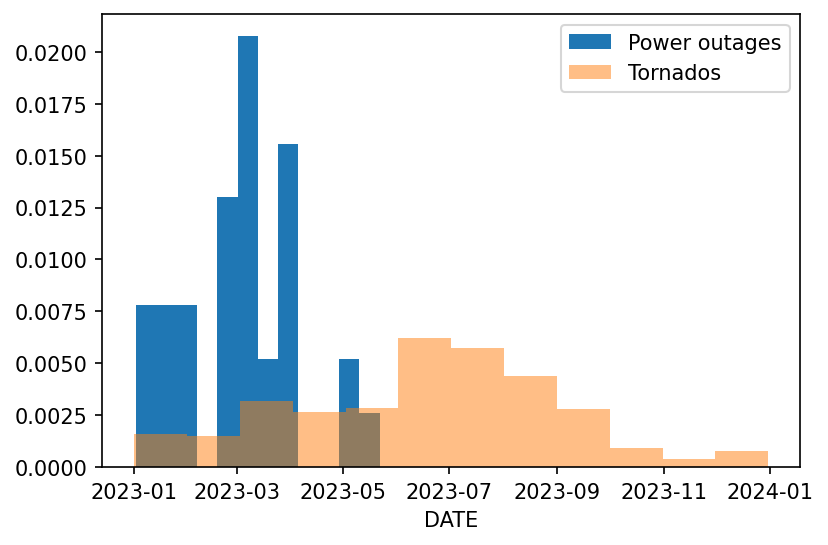

In [24]:
plt.hist(power_2023['Date Event Began'], bins=12, density=True, label='Power outages')
plt.hist(weather_2023['DATE'], bins=12, alpha=0.5, density=True, label='Tornados')
plt.legend()
plt.xlabel('DATE')

## Which Tornado value correlates with which one

In [19]:
corr_matrix = weather_2023[cols[10:]].corr()

<AxesSubplot: >

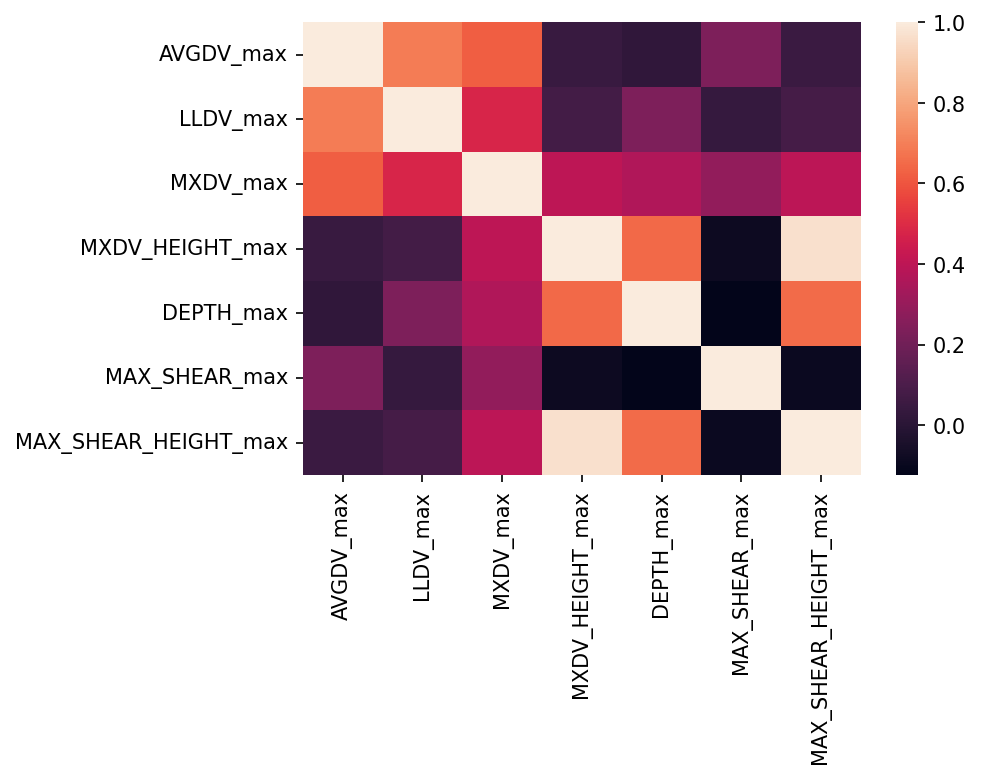

In [23]:
sns.heatmap(corr_matrix)

In [25]:
merged = pd.read_csv('../merged/tornados_outage_2023.csv', parse_dates=['DATE'])

In [26]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            40152 non-null  int64         
 1   DATE                  40152 non-null  datetime64[ns]
 2   AVGDV_max             40152 non-null  int64         
 3   LLDV_max              40152 non-null  int64         
 4   MXDV_max              40152 non-null  int64         
 5   MXDV_HEIGHT_max       40152 non-null  int64         
 6   DEPTH_max             40152 non-null  float64       
 7   MAX_SHEAR_max         40152 non-null  int64         
 8   MAX_SHEAR_HEIGHT_max  40152 non-null  float64       
 9   location              40152 non-null  object        
 10  county                39466 non-null  object        
 11  state                 40152 non-null  object        
 12  Event Month           7285 non-null   object        
 13  power_outage    

In [41]:
bydate_withoutage = merged[merged.power_outage].groupby('DATE')['DATE'].count()
bydate_all = merged.groupby('DATE')['DATE'].count()

In [44]:
bydate_withoutage.index

DatetimeIndex(['2023-01-12', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-31', '2023-02-22', '2023-02-25', '2023-03-02',
               '2023-03-03', '2023-03-25', '2023-03-31', '2023-04-01',
               '2023-04-29', '2023-05-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [47]:
dates_withoutage, counts_withoutage = bydate_withoutage.index, np.array(bydate_withoutage)
dates_all, counts_all = bydate_all.index, np.array(bydate_all)


Text(0, 0.5, 'number of events')

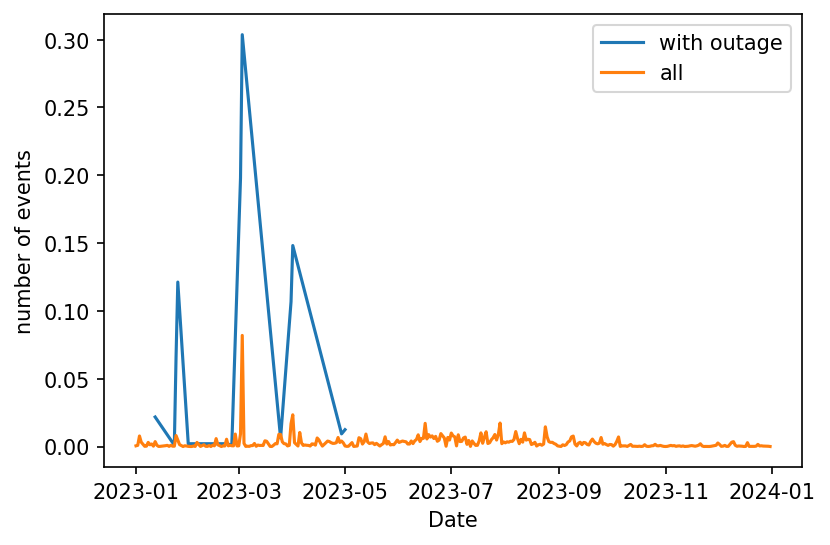

In [52]:
plt.plot(dates_withoutage, counts_withoutage/np.sum(counts_withoutage), label='with outage')
plt.plot(dates_all, counts_all/np.sum(counts_all), label='all')
plt.legend()
plt.xlabel('Date')
plt.ylabel('number of events')

Text(0, 0.5, 'normalized number of events')

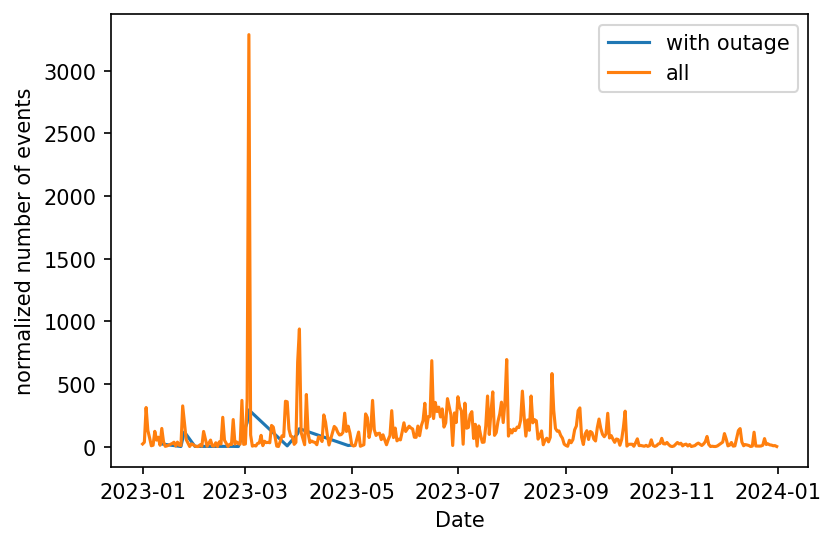

In [50]:
plt.plot(dates_withoutage, counts_withoutage, label='with outage')
plt.plot(dates_all, counts_all, label='all')
plt.legend()
plt.xlabel('Date')
plt.ylabel('normalized number of events')